# Lesson 4 Assignment - Automobile Price Hypothesis Testing
## Author - 

### Instructions
Test hypotheses for the price of automobiles:

1. Compare and test the normality of the distributions of **price** and **log price**. <br/>
Use both a graphical method and a formal test. Hint: remember these relationships will always be approximate.

2. Test significance of **price (or log price)** stratified by 
a) **fuel type**, b) **aspiration**, and c) **rear vs. front wheel drive**. <br />Use both graphical methods and the formal test.

3. Apply ANOVA and Tukey's HSD test to the auto price data to compare the **price (or log price** if closer to a normal distribution) of autos stratified by **body style**.

4. Graphically explore the differences between the price conditioned by the categories of each variable. <br/>
Hint: Make sure you have enough data for each category and drop categories with insufficient data.

5. Use standard ANOVA and Tukey HSD to test the differences of these groups.


#### Note: 
Please clearly outline the results of these tests with markdown text. Be sure your discussion includes narrative for your figures and tables so it is clear to the reader the importance of each bit of evidence.

In [1]:
# Cleaned up Dataset location
fileName = "https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/Automobile%20price%20data%20_Raw_.csv"

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
import numpy.random as nr
import scipy.stats as ss
%matplotlib inline

In [3]:
#read data
df = pd.read_csv(fileName)
#showing the first seven columns of the dataframe
df.iloc[::,:7].head() 

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style
0,3,?,alfa-romero,gas,std,two,convertible
1,3,?,alfa-romero,gas,std,two,convertible
2,1,?,alfa-romero,gas,std,two,hatchback
3,2,164,audi,gas,std,four,sedan
4,2,164,audi,gas,std,four,sedan


It's apparent that some missing values in normalized-losses. 

In [4]:
#show the seventh columns to fifteenth columns
df.iloc[::,7:15].head()

,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type
0,rwd,front,88.6,168.8,64.1,48.8,2548,dohc
1,rwd,front,88.6,168.8,64.1,48.8,2548,dohc
2,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv
3,fwd,front,99.8,176.6,66.2,54.3,2337,ohc
4,4wd,front,99.4,176.6,66.4,54.3,2824,ohc


In [5]:
#show the rest of the dataframe
df.iloc[::, 15:21].head()

,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio
0,four,130,mpfi,3.47,2.68,9.0
1,four,130,mpfi,3.47,2.68,9.0
2,six,152,mpfi,2.68,3.47,9.0
3,four,109,mpfi,3.19,3.40,10.0
4,five,136,mpfi,3.19,3.40,8.0


In [6]:
df.iloc[::,21:].head()

,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,111,5000,21,27,13495
1,111,5000,21,27,16500
2,154,5000,19,26,16500
3,102,5500,24,30,13950
4,115,5500,18,22,17450


Reading the dataframe for the first row, we get a brief ideas of each column. What they are, and how the data are presented. Both numerical and categorical variables are presented. 

### 1. Compare and test the normality of the distributions of price and log price.
Use both a graphical method and a formal test. Hint: remember these relationships will always be approximate.

To test normality, K-S stats will be used. 

First, we need to take a log of price, return a column.

In [7]:
#Check the data type for all variables
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

It's interesting that price is not a numberical data, so we need to convert it to numeric data first.

In [8]:
#using to_numeric to convert dtype to numberic type
df['price'] = pd.to_numeric(df['price'], errors='coerce')

#if they are missing values, remove the missing values
df.dropna(inplace=True)

#create log price
df['log price'] = np.log(df['price'])

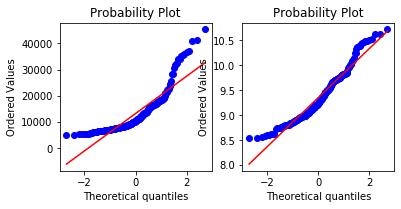

In [9]:
def qq_plot(vec1, vec2):
    import scipy.stats as ss
    plt.figure(figsize=(6, 6)).gca() # define axis
    ax1 = plt.subplot(221) ## setup the left subplot
    ss.probplot(vec1, plot = ax1) ## Plot the left subplot
    ax1 = plt.subplot(222) ## Set up the right subplot
    ss.probplot(vec2, plot = ax1) ## Plot the right subplot
    
qq_plot(df['price'],df['log price'])

Q-Q plots for price(left) and log price(right) are shown above. By eyes, log price is more straight than price, suggesting that log price could be more normal than price. We need to do a further test to evaluate that. K-S test could be used. 

And we need to standardized samples before applying the K-S test.

In [10]:
#standardize both price and log price
n_p = scale(df['price'])
n_lp = scale(df['log price'])

In [11]:
def ks_test(dat, name, dist = 'norm'):
    from scipy.stats import kstest 
    ks_statisic, pvalue = kstest(dat, dist)
    print('KS-statistic for '+ name + ' = ' + str(ks_statisic))
    print('P-value for ' + name + '= ' + str(pvalue))
    
ks_test(n_p, 'price')    

KS-statistic for price = 0.1542761480184771
P-value for price= 0.00012108611006800808


In [12]:
ks_test(n_lp, 'log price')   

KS-statistic for log price = 0.09781904713791056
P-value for log price= 0.03984598613097214


Based on the statitics, both p-values smaller than the classic 0.05 threshold, suggesting we can reject the null hypothesis in both cases. If we set threshold alpha smaller, like 1%. In this case, we cannot reject the null hypothesis for log price, suggesting that log price has no difference to normal distribution.

Log price will be used for the rest of the exercise.

In the rest of exercise, alpha = 0.05 as threshold.

### 2. Test significance of price stratified by a) fuel type, b) aspiration, and c) rear vs. front wheel drive.  Use both graphical methods and the formal test.

## Price vs Fuel type

In [13]:
#check what fuel types have 
df['fuel-type'].unique()

array(['gas', 'diesel'], dtype=object)

Fuel-type only has two kind of entries, either gas and diessel. Comparing the prices for coresponding categories can be achieved using t-test.

In [14]:
#create new dataframes for gas and diesel
gas =pd.DataFrame()
diesel = pd.DataFrame()
# fuel[['fuel', 'price']] = df[['fuel-type','price']]
print ( 'total gas smaples:' ,sum(df['fuel-type'] == 'gas'))
print('total samples:' ,df.shape[0])

total gas smaples: 181
total samples: 201


Check the sample size for each fuel type, and found that this is an unbalance sample size problem. Solution to this unbalance problem is:

1. get the same group size.

2. do welch's test.

In this case, 1 is possible, suggesting that we use all diesel samples, and randomly pick 20 from gas. t-test is more familiar to me, so I would use t_test to measure the difference for 20 gas and diesel samples.

First, I need to randomly pick 20 samples from gas use Bernoulli sampling.

In [15]:
# put samples into correponding dataframe
gas['gas price']=df[df['fuel-type'] == 'gas']['log price']
diesel['diesel price']=df[df['fuel-type'] == 'diesel']['log price']

#  Bernoulli sampling
p = 0.1
gas_20 = gas.iloc[nr.choice(range(181), size = int(p * 200)), :]

gas_20 and diesel will be used for t-test

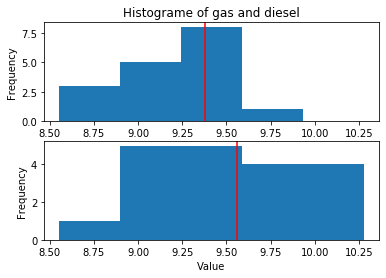

In [16]:
def hist_plot(vec, bins):
    from statistics import mean
    plt.hist(vec, bins = bins)
    plt.axvline(mean(vec), color = 'red')
    plt.ylabel('Frequency')
    plt.xlabel('Value')
    
def plot_pop(a, b, cols=['gas', 'diesel'], nbins = 5):
    minx = min([min(a), min(b)])
    maxx = max([max(a), max(b)])
    stepx = (maxx - minx)/(nbins + 1)
    bins = [minx + i * stepx for i in range(nbins + 1)]
    plt.subplot(2, 1, 1) # The first plot
    hist_plot(a, bins)
    plt.title('Histograme of ' + cols[0] + ' and ' + cols[1])
    plt.subplot(2, 1, 2) # The next plot
    hist_plot(b, bins)

plot_pop(gas_20['gas price'], diesel['diesel price'])    

Notice that the values of the distributions of these populations overlap quite a bit and the means are close. Next, we need to compute t-test to determine whether they are significantly different.

In [17]:
def t_test(a, b, alpha, alternative='two-sided'):
    from scipy import stats
    import scipy.stats as ss
    import statsmodels.stats.weightstats as ws
    
    diff = a.mean() - b.mean()

    res = ss.ttest_ind(a, b, equal_var=False)
      
    means = ws.CompareMeans(ws.DescrStatsW(a), ws.DescrStatsW(b))
    confint = means.tconfint_diff(alpha=alpha, 
                                  alternative=alternative, usevar='unequal') 
    degfree = means.dof_satt()

    index = ['DegFreedom', 'Difference', 'Statistic', 
             'PValue', 'Low95CI', 'High95CI']
    return pd.Series([degfree, diff, res[0], res[1],
                      confint[0], confint[1]], index = index)   
   

fuel = t_test(gas_20['gas price'], diesel['diesel price'], 0.05)
fuel

DegFreedom    36.978942
Difference    -0.179222
Statistic     -1.060474
PValue         0.295807
Low95CI       -0.521659
High95CI       0.163215
dtype: float64

From stats:

1. Difference in means is large.
2. The t-statistic is small and the p-value is small. Based on these statistics we can reject the null hypothesis.

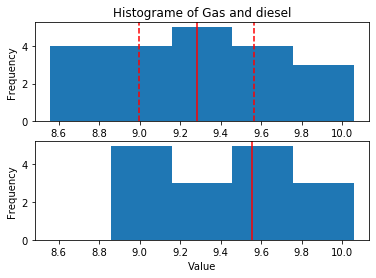

In [18]:
def hist_mean_ci(vec, t_test, bins):
    import matplotlib.pyplot as plt
    from statistics import mean
    upper = mean(vec) + t_test[5] - t_test[1]
    lower = mean(vec) + t_test[4] - t_test[1]
    plt.hist(vec, bins = bins)
    plt.axvline(mean(vec), color = 'red')
    plt.axvline(upper, color = 'red', linestyle='--')
    plt.axvline(lower, color = 'red', linestyle='--')
    plt.ylabel('Frequency')
    plt.xlabel('Value')

def plot_t(a, b, t_test, cols=['Gas', 'diesel'], nbins = 5):
    import matplotlib.pyplot as plt
    minx = min([min(a), min(b)])
    maxx = max([max(a), max(b)])
    stepx = (maxx - minx)/(nbins + 1)
    bins = [minx + i * stepx for i in range(nbins + 1)]
    plt.subplot(2, 1, 1) # The first plot
    hist_mean_ci(a, t_test, bins)
    plt.title('Histograme of ' + cols[0] + ' and ' + cols[1])
    plt.subplot(2, 1, 2) # The next plot
    hist_plot(b, bins)
    
plot_t(gas_20['gas price'], diesel['diesel price'], fuel)    

Notice that the mean of the population in the lower plot does not overlay in the confidence interval of the upper populations. This confirms that we can reject the null hypothesis that there is significant difference in these means. Therefore, diesel car is more expensive than gas car.

## Price vs Aspiration

In [19]:
df['aspiration'].unique()

array(['std', 'turbo'], dtype=object)

Aspiration only has two kind of entries, either std and turbo. Comparing the prices for coresponding categories can be achieved using t-test.

In [20]:
#create new dataframes for gas and diesel
std =pd.DataFrame()
turbo = pd.DataFrame()
print ( 'total std smaples:' ,sum(df['aspiration'] == 'std'))
print('total samples:' ,df.shape[0])

total std smaples: 165
total samples: 201


Check the sample size for each aspiration, and found that this is an unbalance sample size problem. Solution to this unbalance problem is get the same group size. (Similar to fuel type problem)

First, I need to randomly pick 36 samples from std use Bernoulli sampling.

In [21]:
# put samples into correponding dataframe
std['std price']=df[df['aspiration'] == 'std']['log price']
turbo['turbo price']=df[df['aspiration'] == 'turbo']['log price']

#  Bernoulli sampling
p = 0.1
std_36= std.iloc[nr.choice(range(165), size = int(p * 360)), :]

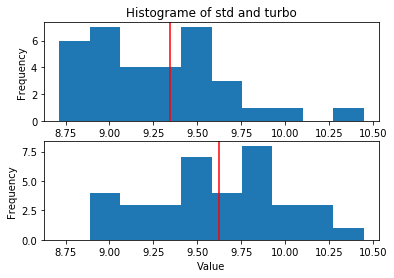

In [22]:
def plot_pop(a, b, cols=['std', 'turbo'], nbins = 10):
    minx = min([min(a), min(b)])
    maxx = max([max(a), max(b)])
    stepx = (maxx - minx)/(nbins + 1)
    bins = [minx + i * stepx for i in range(nbins + 1)]
    plt.subplot(2, 1, 1) # The first plot
    hist_plot(a, bins)
    plt.title('Histograme of ' + cols[0] + ' and ' + cols[1])
    plt.subplot(2, 1, 2) # The next plot
    hist_plot(b, bins)

plot_pop(std_36['std price'], turbo['turbo price']) 

Notice that the values of the distributions of these populations overlap a bit and the means are close. Next, we need to compute t-test to determine whether they are significantly different.

In [23]:
aspiration = t_test(std_36['std price'], turbo['turbo price'],0.05) 
aspiration

DegFreedom    66.389607
Difference    -0.281059
Statistic     -2.724720
PValue         0.008219
Low95CI       -0.486986
High95CI      -0.075133
dtype: float64

From stats:

1. Difference in means is large.
2. The t-statistic is small and the p-value is small. Therefore, there is a low chance that the difference in means is from random variation alone.
Based on these statistics we can reject the null hypothesis that price for std car is different from turbo car.

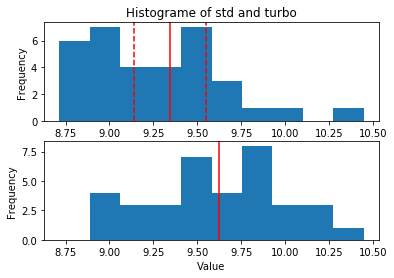

In [24]:
def plot_t(a, b, t_test, cols=['std', 'turbo'], nbins = 10):
    import matplotlib.pyplot as plt
    minx = min([min(a), min(b)])
    maxx = max([max(a), max(b)])
    stepx = (maxx - minx)/(nbins + 1)
    bins = [minx + i * stepx for i in range(nbins + 1)]
    plt.subplot(2, 1, 1) # The first plot
    hist_mean_ci(a, t_test, bins)
    plt.title('Histograme of ' + cols[0] + ' and ' + cols[1])
    plt.subplot(2, 1, 2) # The next plot
    hist_plot(b, bins)
    
plot_t(std_36['std price'], turbo['turbo price'], aspiration)

Notice that the mean of the population in the lower plot is beyond the confidence interval of the difference of means of the populations. This confirms that we can reject the null hypothesis that there is significant difference in these means. Therefore, turbo car in general is more expensive than std car. 

## Price vs drive-wheels

In [25]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In this problem, we only need rwd and fwd.

In [26]:
#create new dataframes for gas and diesel
rwd =pd.DataFrame()
fwd = pd.DataFrame()
print ( 'total rwd smaples:' ,sum(df['drive-wheels'] == 'rwd'))
print('total fwd samples:',sum(df['drive-wheels'] == 'fwd'))

total rwd smaples: 75
total fwd samples: 118


Check the sample size, and found that this is an unbalance sample size problem, only slightly unbalanced. Solution to this unbalance problem is get the same group size. (Similar to fuel type problem)

First, I need to randomly pick 75 samples from fwd use Bernoulli sampling.

In [27]:
# put samples into correponding dataframe
rwd['rwd price']=df[df['drive-wheels'] == 'rwd']['log price']
fwd['fwd price']=df[df['drive-wheels'] == 'fwd']['log price']

#  Bernoulli sampling
p = 0.1
fwd_75= fwd.iloc[nr.choice(range(118), size = int(p * 750)), :]

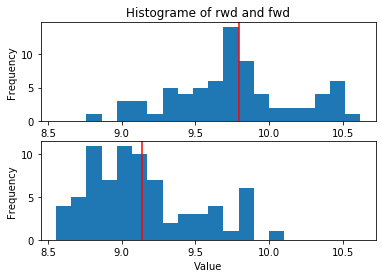

In [28]:
def plot_pop(a, b, cols=['rwd', 'fwd'], nbins = 20):
    minx = min([min(a), min(b)])
    maxx = max([max(a), max(b)])
    stepx = (maxx - minx)/(nbins + 1)
    bins = [minx + i * stepx for i in range(nbins + 1)]
    plt.subplot(2, 1, 1) # The first plot
    hist_plot(a, bins)
    plt.title('Histograme of ' + cols[0] + ' and ' + cols[1])
    plt.subplot(2, 1, 2) # The next plot
    hist_plot(b, bins)

plot_pop(rwd['rwd price'], fwd_75['fwd price'])

Notice that the values of the distributions of these populations overlap a little bit and the means are not so close. Next, we need to compute t-test to determine whether they are significantly different.

In [29]:
drive= t_test(rwd['rwd price'], fwd_75['fwd price'],0.05)
drive

DegFreedom    1.428223e+02
Difference    6.549171e-01
Statistic     9.995271e+00
PValue        3.670283e-18
Low95CI       5.253976e-01
High95CI      7.844367e-01
dtype: float64

From stats:

1. Difference in means is large.
2. The t-statistic is large and the p-value is very small. Therefore, there is a low chance that the difference in means is from random variation alone.
Based on these statistics we can reject the null hypothesis that price for rwd car is different from fwd car.

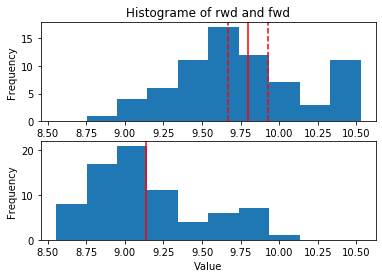

In [30]:
def plot_t(a, b, t_test, cols=['rwd', 'fwd'], nbins = 10):
    import matplotlib.pyplot as plt
    minx = min([min(a), min(b)])
    maxx = max([max(a), max(b)])
    stepx = (maxx - minx)/(nbins + 1)
    bins = [minx + i * stepx for i in range(nbins + 1)]
    plt.subplot(2, 1, 1) # The first plot
    hist_mean_ci(a, t_test, bins)
    plt.title('Histograme of ' + cols[0] + ' and ' + cols[1])
    plt.subplot(2, 1, 2) # The next plot
    hist_plot(b, bins)
    
plot_t(rwd['rwd price'], fwd_75['fwd price'],drive)

Notice that the mean of the population in the lower plot is beyond the confidence interval of the difference of means of the populations. This confirms that we can reject the null hypothesis that there is significant difference between rwd and fwd car prices. Therefore, rwd car in general is more expensive than fwd car.

### Apply ANOVA and Tukey's HSD test to the auto price data to compare the price (or log price, if closer to a Normal distribution) of autos stratified by body style.

In [31]:
df['body-style'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

There are five groups in body style. ANOVA and HSD will be applied.

In [32]:
conv = pd.DataFrame()
hat = pd.DataFrame()
sed = pd.DataFrame()
wag = pd.DataFrame()
hard = pd.DataFrame()

conv['conv price']=df[df['body-style'] == 'convertible']['log price']
hat['hat price']=df[df['body-style'] == 'hatchback']['log price']
sed['sed price']=df[df['body-style'] == 'sedan']['log price']
wag['wag price']=df[df['body-style'] == 'wagon']['log price']
hard['hard price']=df[df['body-style'] == 'hardtop']['log price']

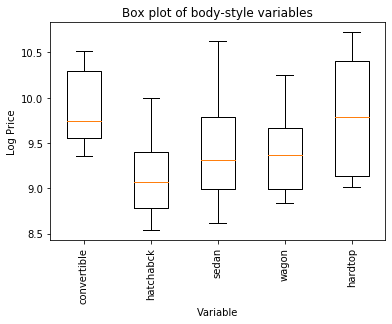

In [33]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot([conv['conv price'], hat['hat price'], 
             sed['sed price'], wag['wag price'], hard['hard price']])
plt.ylabel('Log Price')
ax.set_xticklabels(['convertible', 'hatchabck','sedan','wagon', 'hardtop'], rotation = 'vertical')
plt.xlabel('Variable')
plt.title('Box plot of body-style variables');

The plot shows variation between the distributions of the five variables. Nest, we need to compute F-statistic and a p-value using `f_oneway` function

In [34]:
f_statistic, p_value = ss.f_oneway(conv['conv price'], hat['hat price'],
                                   sed['sed price'], wag['wag price'], 
                                   hard['hard price'])
print('F statistic = ' + str(f_statistic))
print('P-value = ' + str(p_value))

F statistic = 8.458887676111926
P-value = 2.573333086083424e-06


The F statistic is fairly large and the p-value is small. We can reject the null hypothesis that the 5 variables have the same mean, as the probability of the differences arising from random chance is quite low.

From the above ANOVA results we know that there is some difference in the means of these variables. However, the ANOVA does not tell us which variable is significantly different. So we need to perform HSD test.

In [35]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
df2 = pd.DataFrame({'vals' :conv['conv price'].tolist() + 
                    hat['hat price'].tolist() +
                   sed['sed price'].tolist() +wag['wag price'].tolist() +
                    hard['hard price'].tolist(),
                   'group_num': ['conv'] * len(conv) + ['hat'] * len(hat) + 
                    ['sed'] * len(sed) +
                   ['wag'] * len(wag) + ['hard'] *len(hard) })
Tukey_HSD = pairwise_tukeyhsd(df2.vals, df2.group_num)
print(Tukey_HSD)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  conv   hard  -0.0966    0.9 -0.7933     0.6  False
  conv    hat  -0.7628 0.0016 -1.3122 -0.2134   True
  conv    sed  -0.4519 0.1522 -0.9951  0.0913  False
  conv    wag  -0.5399 0.0873 -1.1264  0.0465  False
  hard    hat  -0.6662 0.0018 -1.1483  -0.184   True
  hard    sed  -0.3553 0.2422 -0.8304  0.1198  False
  hard    wag  -0.4433   0.14 -0.9673  0.0807  False
   hat    sed   0.3109  0.001  0.1055  0.5163   True
   hat    wag   0.2229 0.2536 -0.0788  0.5246  False
   sed    wag   -0.088    0.9 -0.3783  0.2023  False
----------------------------------------------------


From the table, we can see whether there is significant difference based on p-values and the reject column.

Use `plot_simultaneous` method to plot test results.

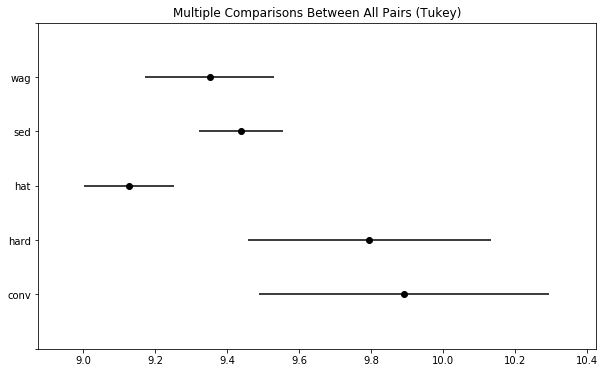

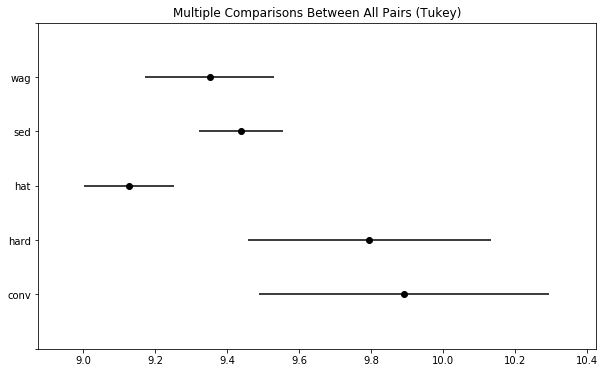

In [36]:
Tukey_HSD.plot_simultaneous()

Examine the plot above. There is a line with a dot shown for each variable. The dot is the mean and the line shows the range of the confidence interval for that mean. If the difference in means is significant at the confidence level, the confidence intervals will not overlap. For example, hardtop and convertible are more expensive than hatchback.

### 4. Graphically explore the differences between the price conditioned by the categories of each variable.
Hint: Make sure you have enough data for each category and drop categories with insufficient data.

We need to evaluate the the relationship bewteen varibles in each category. For categorical data, they are make, fuel-type, aspiration, num-of-doors, body-style, drive-wheels, engine-location,engine-type,num-of-cylinders, and fuel-system.

I have graphically and statstically studied the relationship between price fuel-type, and aspiration using t-test above. And I also studied body-style using ANOVA and Tukey above. 

So I am going to plot prive vs make, num-of-doors, drive-wheels, engine-location,engine-type,num-of-cylinders, and fuel-system in a box-plot for comparisons first.

#### price vs make

In [39]:
make_list = df['make'].unique().tolist()
#create a list for different varibles under 'make' category
make={}
for i in make_list:
    make[i[:4]]= [df[df['make'] == i]['log price'].values.tolist()]

In [40]:
#convert list to Series, so that can used for plotting later
make2 = {}
for i in make_list:
    make2[i] = pd.Series(make[i[:4]][0])

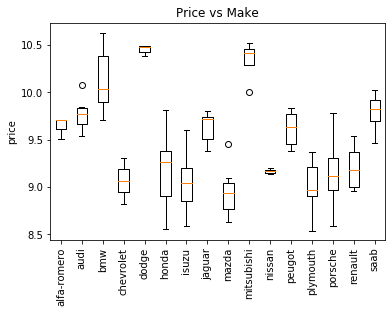

In [41]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot([make2['alfa-romero'], make2['audi'], make2['bmw'], make2['isuzu'], 
             make2['jaguar'], make2['mazda'],make2['mitsubishi'],make2['peugot'],
            make2['plymouth'], make2['porsche'], make2[ 'renault'], make2['saab'],
            make2['subaru'], make2['toyota'], make2['volkswagen'], make2['volvo']]);
ax.set_xticklabels(['alfa-romero','audi','bmw','chevrolet','dodge','honda','isuzu','jaguar',
                    'mazda','mitsubishi','nissan','peugot','plymouth','porsche','renault',
                    'saab','subaru','toyota','volkswagen','volvo'], rotation ='vertical');
ax.set_ylabel('price')
ax.set_title('Price vs Make');

In this boxplot,there are difference between varibales under the 'make' cateogories. We can roughly divided into two groups, high price group, alfa-romero, audi, bmw, dodge,jaguar, mitsubishi, peugit, and saab. The rest would be low price group. 
Note, I remove two varibales, mercury and mercede-benz because there is only on observations in each varible. ANOVA test is performed below.

In [42]:
f_statistic, p_value = ss.f_oneway(make2['alfa-romero'], make2['audi'], make2['bmw'], make2['isuzu'], 
             make2['jaguar'], make2['mazda'],make2['mitsubishi'],make2['peugot'],
            make2['plymouth'], make2['porsche'], make2[ 'renault'], make2['saab'],
            make2['subaru'], make2['toyota'], make2['volkswagen'], make2['volvo'])
print('F statistic = ' + str(f_statistic))
print('P-value = ' + str(p_value))

F statistic = 20.123820569550848
P-value = 3.193777907303874e-27


The F statistic is fairly large and the p-value is small. We can reject the null hypothesis that variables have the same mean, as the probability of the differences arising from random chance is quite low.

From the above ANOVA results we know that there is some difference in the means of these variables. However, the ANOVA does not tell us which variable is significantly different. So we need to perform HSD test.

In [43]:
make_final = pd.DataFrame({'vals' :make2['alfa-romero'].tolist() + make2['audi'].tolist() + 
                           make2['bmw'].tolist() + make2['isuzu'].tolist()+ 
                           make2['jaguar'].tolist() + make2['mazda'].tolist() + 
                           make2['mitsubishi'].tolist() + make2['peugot'].tolist()+
                           make2['plymouth'].tolist() + make2['porsche'].tolist()+ 
                           make2[ 'renault'].tolist() + make2['saab'].tolist()+
                           make2['subaru'].tolist() +make2['toyota'].tolist()  + 
                           make2['volkswagen'].tolist() + make2['volvo'].tolist(),
                           'group_num': ['alra-romero'] * len(make2['alfa-romero']) + ['audi'] * len(make2['audi']) +
                           ['bmw']* len(make2['bmw']) + ['isuzu']*len (make2['isuzu']) + ['jaguar'] * len(make2['jaguar']) +
                           ['mazda'] * len(make2['mazda']) + ['mitsubishi'] * len(make2['mitsubishi']) + 
                           ['peugot'] * len (make2['peugot']) + ['plymouth'] * len (make2['plymouth']) +
                           ['porsche'] * len (make2['porsche']) + ['renault'] *len( make2[ 'renault']) +
                           ['saab'] * len(make2['saab']) + ['subara'] * len(make2['subaru']) +
                           ['toyota'] * len(make2['toyota']) + ['vol'] * len(make2['volkswagen']) +
                           ['vol'] * len(make2['volvo']) })
Tukey_HSD = pairwise_tukeyhsd(make_final.vals, make_final.group_num)
print(Tukey_HSD)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
   group1     group2   meandiff p-adj   lower   upper  reject
-------------------------------------------------------------
alra-romero       audi   0.1314    0.9 -0.5929  0.8557  False
alra-romero        bmw   0.4733 0.5428 -0.2202  1.1667  False
alra-romero      isuzu  -0.5779 0.6819 -1.5129  0.3572  False
alra-romero     jaguar   0.8063 0.0717   -0.03  1.6426  False
alra-romero      mazda   -0.435  0.552 -1.0765  0.2064  False
alra-romero mitsubishi  -0.5599 0.1881  -1.216  0.0962  False
alra-romero     peugot  -0.0063    0.9 -0.6735  0.6608  False
alra-romero   plymouth  -0.6954 0.0589 -1.4023  0.0114  False
alra-romero    porsche   0.6919 0.1462 -0.0905  1.4742  False
alra-romero    renault  -0.4756    0.9 -1.4106  0.4595  False
alra-romero       saab  -0.0286    0.9 -0.7529  0.6957  False
alra-romero     subara   -0.616 0.0966 -1.2772  0.0452  False
alra-romero     toyota  -0.4905 0.2933 -1.1089   0.128  False
alra-rom

In this statsitic summary, difference between variables can be viewed in the last column. True means that there is difference between two variables. For example, toyota and vol, p value is 0.0295, smaller than 0.05, so we can reject null hypothesis, suggesting that there is difference between toyota and vol.

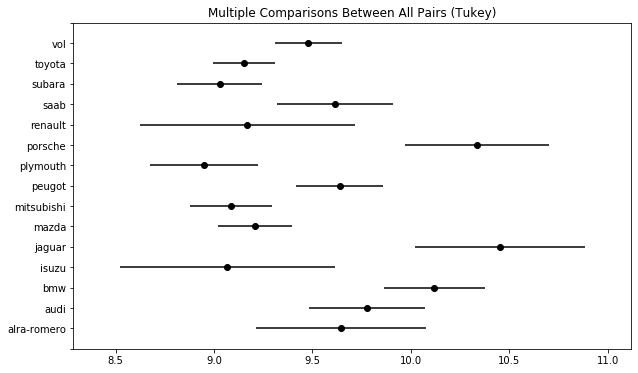

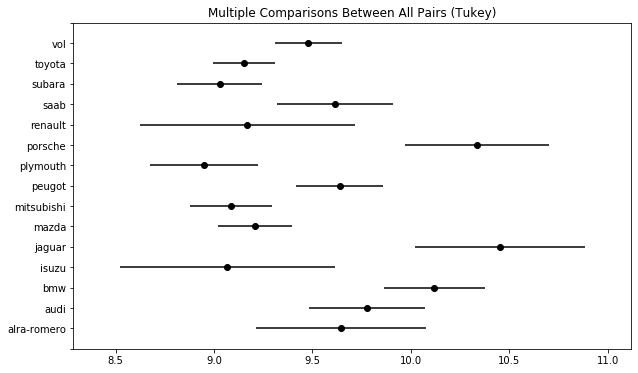

In [44]:
Tukey_HSD.plot_simultaneous()

Examine the plot above. There is a line with a dot shown for each variable. The dot is the mean and the line shows the range of the confidence interval for that mean. Take vol and toyota for example. Confidence interval for these two varibales actually overlap with each other a little bit. But from the p-values, we still can reject the null hypothesis at alpha 0.05

#### price vs num-of-doors

In [45]:
df['num-of-doors'].unique()

array(['two', 'four', '?'], dtype=object)

Missing values present, in this case, I will remove missing values then perform the graphical comparison

In [46]:
#replace ? with NaN, then use dropna() to remove missing values
p_door = pd.DataFrame({'door': df['num-of-doors'], 'price': df['log price']})
door_missing= p_door['door'] =='?'
p_door.loc[door_missing, 'door'] = np.nan
p_door.dropna(inplace= True)

door_list = p_door['door'].unique().tolist()
doors={}
for i in door_list:
    doors[i[:4]]= [p_door[p_door['door'] == i]['price'].values.tolist()]
    
doors2 = {}
for i in door_list:
    doors2[i] = pd.Series(doors[i][0])

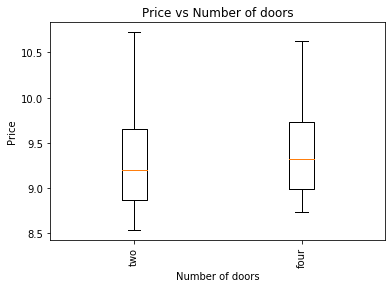

In [47]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot([doors2['two'], doors2['four']])
ax.set_xticklabels(['two', 'four'], rotation ='vertical')
ax.set_xlabel('Number of doors')
ax.set_ylabel('Price')
ax.set_title('Price vs Number of doors');

In the box plot for Price vs Number of doors, price has no significant difference between two and four doors car.

Since there are only two variables, so using t-test is more appropriate.

In [48]:
door = t_test(doors2['two'], doors2['four'], 0.05)
door

DegFreedom    167.777043
Difference     -0.103772
Statistic      -1.413379
PValue          0.159397
Low95CI        -0.248721
High95CI        0.041177
dtype: float64

Thethe p-value is large. We cannot  reject the null hypothesis that variables have the same mean.

Price for two and four doors car has no difference.

#### Price vs drive-wheels

In [49]:
#create a dict for different variables for drive-wheels category
dw_list = df['drive-wheels'].unique().tolist()
dw={}
for i in dw_list:
    dw[i]= [df[df['drive-wheels'] == i]['log price'].values.tolist()]
    
dw2 = {}
for i in dw_list:
    dw2[i] = pd.Series(dw[i][0])

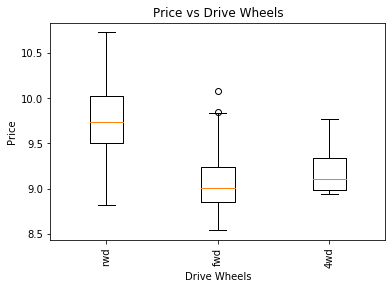

In [50]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot([dw2['rwd'], dw2['fwd'], dw2['4wd']])
ax.set_xticklabels(['rwd', 'fwd', '4wd'], rotation ='vertical')
ax.set_xlabel('Drive Wheels')
ax.set_ylabel('Price')
ax.set_title('Price vs Drive Wheels');

In this Price vs Drive Wheels comparison, price for rwd is higher than fwd and 4wd.

In [51]:
f_statistic, p_value = ss.f_oneway(dw2['rwd'], dw2['fwd'], dw2['4wd'])
print('F statistic = ' + str(f_statistic))
print('P-value = ' + str(p_value))

F statistic = 88.457041524516
P-value = 3.553122325860982e-28


The F statistic is fairly large and the p-value is small. We can reject the null hypothesis that variables have the same mean.

From the above ANOVA results we know that there is a difference in the means of these variables.However, the ANOVA does not tell us which variable is significantly different. So we need to perform HSD test.

In [52]:
dw_final = pd.DataFrame({'vals' :dw2['rwd'].tolist() + dw2['fwd'].tolist() + dw2['4wd'].tolist(), 
                           'group_num': ['rwd']*len(dw2['rwd']) + ['fwd']*len(dw2['fwd']) + ['4wd']*len(dw2['4wd'])})
Tukey_HSD = pairwise_tukeyhsd(dw_final.vals, dw_final.group_num)
print(Tukey_HSD)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   4wd    fwd   -0.119 0.6367 -0.4355 0.1975  False
   4wd    rwd   0.5986  0.001  0.2764 0.9208   True
   fwd    rwd   0.7176  0.001  0.5896 0.8455   True
---------------------------------------------------


In this statsitic summary, difference between variables can be viewed in the last column. True means that there is difference between two variables. For example, 4wd and fwd, p value is 0.89, greater than 0.05, so we cannot reject null hypothesis, suggesting that there is no difference between fwd and 4wd, which also agrees with the box plot.

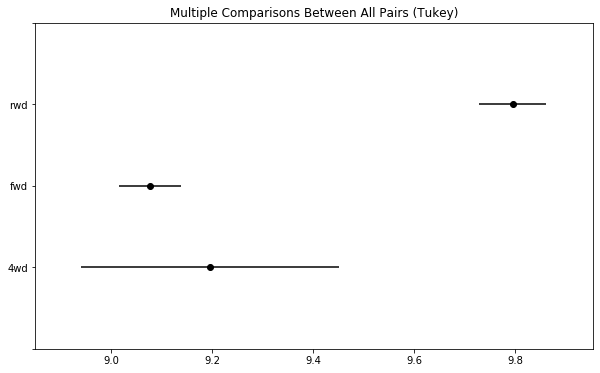

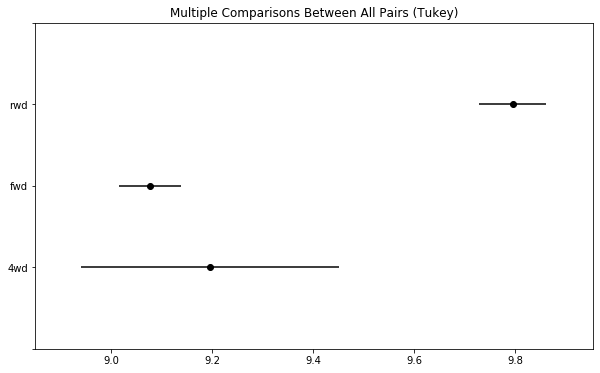

In [53]:
Tukey_HSD.plot_simultaneous()

Examine the plot above. There is a line with a dot shown for each variable. The dot is the mean and the line shows the range of the confidence interval for that mean. Take 4wd and fwd for example. Confidence interval for these two varibales actually overlap with each other, so we cannot reject the null hypothesis. 

#### Price vs  engine-location

In [54]:
#create a dict for varibels in engine-location category
el_list = df['engine-location'].unique().tolist()
el={}
for i in el_list:
    el[i]= [df[df['engine-location'] == i]['log price'].values.tolist()]
    
el2 = {}
for i in el_list:
    el2[i] = pd.Series(el[i][0])

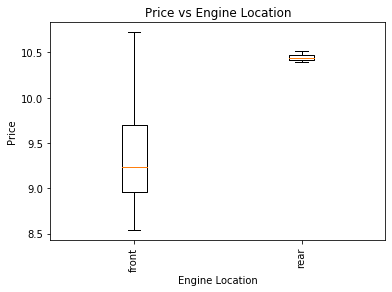

In [55]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot([el2['front'], el2['rear']])
ax.set_xticklabels(['front', 'rear'], rotation ='vertical')
ax.set_xlabel('Engine Location')
ax.set_ylabel('Price')
ax.set_title('Price vs Engine Location');

In this price vs engine location plot, price for rear engine location is higher than front engine car.

Since there are only two groups, t-test is used instead of ANOVA.

In [56]:
el = t_test(el2['front'], el2['rear'], 0.05)
el

DegFreedom    6.661318e+00
Difference   -1.114596e+00
Statistic    -2.168738e+01
PValue        1.986190e-07
Low95CI      -1.237387e+00
High95CI     -9.918054e-01
dtype: float64

Thethe p-value is small. We can reject the null hypothesis that variables have the same mean.

Price for rear engine car is more expensive than front engine car.

#### Price vs engine-type

In [57]:
df['engine-type'].unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf'], dtype=object)

In [58]:
#create a dict for varibels in engine-type category
et_list = df['engine-type'].unique().tolist()
et={}
for i in et_list:
    et[i]= [df[df['engine-type'] == i]['log price'].values.tolist()]
    
et2 = {}
for i in et_list:
    et2[i] = pd.Series(et[i][0])

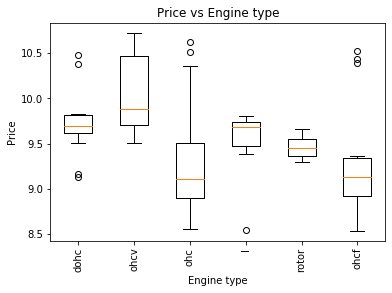

In [59]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot([et2['dohc'], et2['ohcv'], et2['ohc'], et2['l'], et2['rotor'], et2['ohcf']])
ax.set_xticklabels(['dohc', 'ohcv', 'ohc','l','rotor','ohcf'], rotation ='vertical')
ax.set_xlabel('Engine type')
ax.set_ylabel('Price')
ax.set_title('Price vs Engine type');

In thi Price vs Engine type plot, we can roughly divided into two groups, high price vs low price. High price group is dohc, ohcv,l, rotor; ohc and ohcf would be low price group. The more formal analysis is performed below using ANOVA

In [60]:
f_statistic, p_value = ss.f_oneway(et2['dohc'], et2['ohcv'], et2['ohc'], et2['l'], et2['rotor'], et2['ohcf'])
print('F statistic = ' + str(f_statistic))
print('P-value = ' + str(p_value))

F statistic = 9.755399850009487
P-value = 2.470247592772414e-08


The F statistic is fairly large and the p-value is small. We can reject the null hypothesis that variables have the same mean.

From the above ANOVA results we know that there is a difference in the means of these variables.However, the ANOVA does not tell us which variable is significantly different. So we need to perform HSD test.

In [61]:
et_final = pd.DataFrame({'vals' :et2['dohc'].tolist() + et2['ohcv'].tolist() + 
                         et2['ohc'].tolist() + et2['l'].tolist() + et2['rotor'].tolist() +
                         et2['ohcf'].tolist(),
                        'group_num': ['dohc'] * len (et2['dohc']) + ['ohcv'] * len(et2['ohcv']) +
                         ['ohc'] * len(et2['ohc']) +['l']*len(et2['l']) + ['rotor'] * len(et2['rotor']) +
                         ['ohcf']* len( et2['ohcf'])})
Tukey_HSD = pairwise_tukeyhsd(et_final.vals, et_final.group_num)
print(Tukey_HSD)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  dohc      l  -0.1815    0.9 -0.7161  0.3531  False
  dohc    ohc  -0.4867 0.0061   -0.88 -0.0933   True
  dohc   ohcf  -0.4163  0.175 -0.9234  0.0909  False
  dohc   ohcv   0.3087 0.5314 -0.2155  0.8329  False
  dohc  rotor  -0.2635    0.9 -1.0195  0.4924  False
     l    ohc  -0.3052 0.2275 -0.6985  0.0882  False
     l   ohcf  -0.2348 0.7393 -0.7419  0.2724  False
     l   ohcv   0.4902 0.0817  -0.034  1.0144  False
     l  rotor   -0.082    0.9  -0.838  0.6739  False
   ohc   ohcf   0.0704    0.9 -0.2847  0.4255  False
   ohc   ohcv   0.7954  0.001  0.4163  1.1745   True
   ohc  rotor   0.2231    0.9 -0.4405  0.8868  False
  ohcf   ohcv    0.725  0.001  0.2288  1.2211   True
  ohcf  rotor   0.1527    0.9 -0.5841  0.8896  False
  ohcv  rotor  -0.5722 0.2423 -1.3209  0.1764  False
----------------------------------------------

In this statsitic summary, difference between variables can be viewed in the last column. True means that there is difference between two variables. For example, dohc and l, p value is 0.82, greater than 0.05, so we cannot reject null hypothesis, suggesting that there is no difference between dohc and l, which also agrees with the box plot.

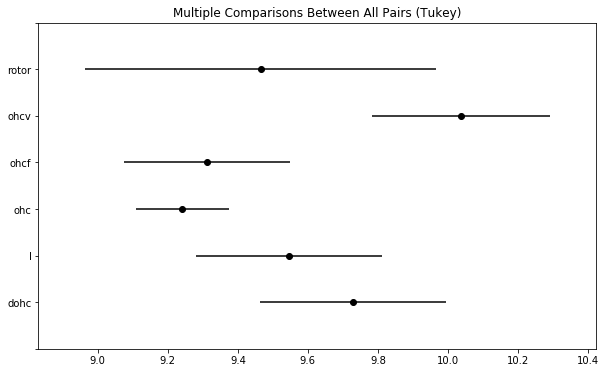

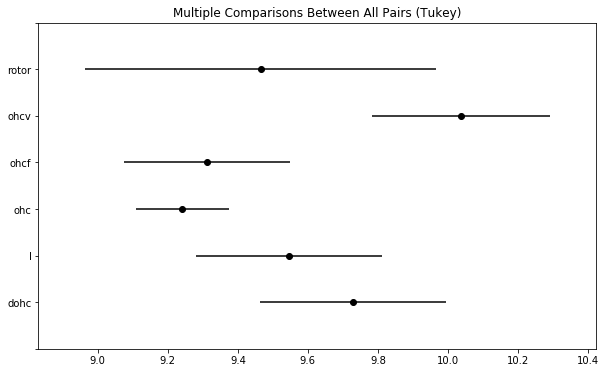

In [62]:
Tukey_HSD.plot_simultaneous()

Examine the plot above. There is a line with a dot shown for each variable. The dot is the mean and the line shows the range of the confidence interval for that mean. Take dohc and l for example. Confidence interval for these two varibales actually overlap with each other, so we cannot reject the null hypothesis. 

#### Price vs num-of-cylinders


In [63]:
#create a dict for varibels in num-of-cylinders category
c_list = df['num-of-cylinders'].unique().tolist()
c={}
for i in c_list:
    c[i]= [df[df['num-of-cylinders'] == i]['log price'].values.tolist()]
    
c2 = {}
for i in c_list:
    c2[i] = pd.Series(c[i][0])
c2

{'four': 0       9.510075
 1       9.711116
 2       9.543235
 3       9.706864
 4       9.736547
          ...    
 152     9.821192
 153     9.849559
 154     9.731809
 155     9.854560
 156    10.026811
 Length: 157, dtype: float64,
 'six': 0      9.711116
 1      9.950848
 2      9.957265
 3     10.109078
 4     10.333970
 5     10.628981
 6     10.515425
 7     10.381273
 8     10.478695
 9      9.510371
 10     9.574914
 11     9.510371
 12     9.752607
 13     9.888323
 14     9.820052
 15    10.389857
 16    10.434939
 17    10.519430
 18     9.714625
 19     9.680219
 20     9.660779
 21     9.664596
 22     9.975110
 23    10.019936
 dtype: float64,
 'five': 0     9.767095
 1     9.632335
 2     9.781885
 3     9.847975
 4    10.080587
 5    10.148471
 6    10.248778
 7    10.246226
 8    10.360912
 9     9.495143
 dtype: float64,
 'three': 0    8.546946
 dtype: float64,
 'twelve': 0    10.491274
 dtype: float64,
 'two': 0    9.300638
 1    9.379661
 2    9.521128
 3    9.657

Note: three and twelve cylinders only have one observations, drop when plotting.


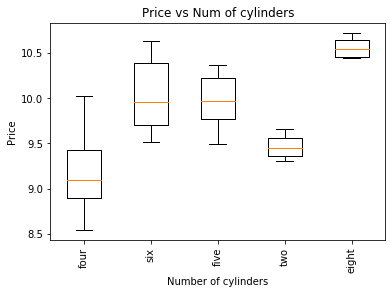

In [64]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot([c2['four'], c2['six'], c2['five'], c2['two'], c2['eight']])
ax.set_xticklabels(['four', 'six', 'five', 'two', 'eight'], rotation ='vertical')
ax.set_xlabel('Number of cylinders')
ax.set_ylabel('Price')
ax.set_title('Price vs Num of cylinders');

In this Price vs Num of cylingers box plot, two and four cylinders have the lowest price,  five and six cylinders have the middle price, while cars with eight cylinders are the most expensive in general. A more formal analysis is performed below using ANOVA.

In [65]:
f_statistic, p_value = ss.f_oneway(c2['four'], c2['six'], c2['five'], c2['two'], c2['eight'])
print('F statistic = ' + str(f_statistic))
print('P-value = ' + str(p_value))

F statistic = 51.00015851520591
P-value = 2.7115058228315566e-29


The F statistic is fairly large and the p-value is small. We can reject the null hypothesis that variables have the same mean.

From the above ANOVA results we know that there is a difference in the means of these variables.However, the ANOVA does not tell us which variable is significantly different. So we need to perform HSD test

In [66]:
c_final = pd.DataFrame({'vals' :c2['four'].tolist()  + c2['six'].tolist()+ c2['five'].tolist()+
                        c2['two'].tolist() + c2['eight'].tolist(),
                        'group_num': ['four'] * len(c2['four']) + ['six']*len (c2['six']) +
                        ['five'] * len(c2['five']) +['two'] * len(c2['two']) + ['eight']*len (c2['eight'])})
Tukey_HSD = pairwise_tukeyhsd(c_final.vals, c_final.group_num)
print(Tukey_HSD)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
 eight   five   -0.601 0.0326 -1.1697 -0.0323   True
 eight   four  -1.3872  0.001 -1.8739 -0.9005   True
 eight    six  -0.5543 0.0299 -1.0735 -0.0352   True
 eight    two  -1.0971  0.001 -1.7769 -0.4174   True
  five   four  -0.7862  0.001 -1.0997 -0.4727   True
  five    six   0.0467    0.9 -0.3151  0.4085  False
  five    two  -0.4961 0.1193 -1.0648  0.0726  False
  four    six   0.8329  0.001  0.6222  1.0436   True
  four    two   0.2901  0.474 -0.1966  0.7768  False
   six    two  -0.5428 0.0355 -1.0619 -0.0236   True
----------------------------------------------------


In this statsitic summary, difference between variables can be viewed in the last column. True means that there is difference between two variables. For example, eight and five, p value is 0.001, smaller than 0.05, so we can reject null hypothesis, suggesting that there is a difference between eight and five engines, which also agrees with the box plot

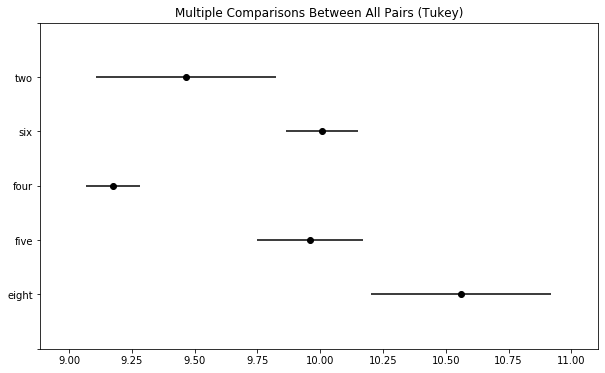

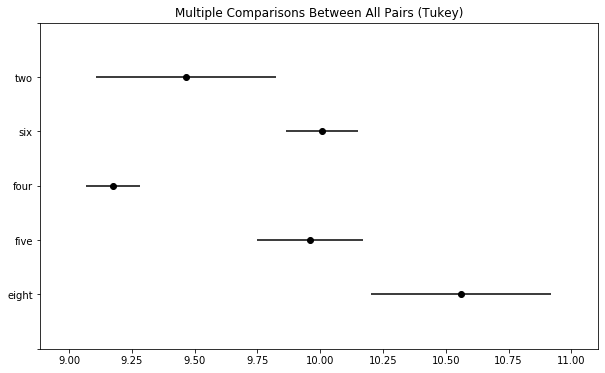

In [67]:
Tukey_HSD.plot_simultaneous()

Examine the plot above. There is a line with a dot shown for each variable. The dot is the mean and the line shows the range of the confidence interval for that mean. Take eight and five for example. Confidence interval for these two varibales do not overlap with each other, so we can reject the null hypothesis. 

#### Prive vs Fuel system

In [68]:
#create a dict for varibels in fuel-system category
fs_list = df['fuel-system'].unique().tolist()
fs={}
for i in fs_list:
    fs[i]= [df[df['fuel-system'] == i]['log price'].values.tolist()]
    
fs2 = {}
for i in fs_list:
    fs2[i] = pd.Series(fs[i][0])
fs2

{'mpfi': 0      9.510075
 1      9.711116
 2      9.711116
 3      9.543235
 4      9.767095
         ...    
 87     9.849559
 88     9.731809
 89     9.854560
 90     9.975110
 91    10.026811
 Length: 92, dtype: float64,
 '2bbl': 0     8.546946
 1     8.747511
 2     8.791030
 3     8.625509
 4     8.760453
         ...   
 59    8.953899
 60    9.030974
 61    9.133243
 62    8.994421
 63    9.016513
 Length: 64, dtype: float64,
 'mfi': 0    9.469932
 dtype: float64,
 '1bbl': 0     8.776321
 1     8.832734
 2     8.593969
 3     8.784009
 4     8.871926
 5     8.894944
 6     8.894944
 7     8.973985
 8     9.115480
 9     9.087608
 10    9.239414
 dtype: float64,
 'spfi': 0    9.310005
 dtype: float64,
 '4bbl': 0    9.300638
 1    9.379661
 2    9.521128
 dtype: float64,
 'idi': 0      9.286838
 1      9.817058
 2     10.148471
 3     10.248778
 4     10.246226
 5     10.360912
 6      8.867709
 7      9.487972
 8      9.536762
 9      9.735069
 10     9.745371
 11     9.795345
 1

mfi, spfi and 4bbl have less than 3 observations, drop when plotting.
 

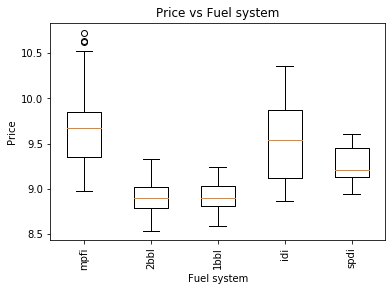

In [69]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot([fs2['mpfi'], fs2['2bbl'], fs2['1bbl'], fs2['idi'], fs2['spdi']])
ax.set_xticklabels(['mpfi', '2bbl', '1bbl', 'idi', 'spdi'], rotation ='vertical')
ax.set_xlabel('Fuel system')
ax.set_ylabel('Price')
ax.set_title('Price vs Fuel system');

In this Price vs Fuel system plot, two groups can be roughly divided. High price group includes mpfi, idi and spdi; while low price group includes 2bbl and 1bbl.

In [70]:
f_statistic, p_value = ss.f_oneway(fs2['mpfi'], fs2['2bbl'], fs2['1bbl'], fs2['idi'], fs2['spdi'])
print('F statistic = ' + str(f_statistic))
print('P-value = ' + str(p_value))

F statistic = 50.70042160690783
P-value = 4.900245053363258e-29


The F statistic is fairly large and the p-value is small. We can reject the null hypothesis that variables have the same mean.

From the above ANOVA results we know that there is a difference in the means of these variables.However, the ANOVA does not tell us which variable is significantly different. So we need to perform HSD test

In [71]:
f_final = pd.DataFrame({'vals' :fs2['mpfi'].tolist() + fs2['2bbl'].tolist() + fs2['1bbl'].tolist() +
                        fs2['idi'].tolist() + fs2['spdi'].tolist(),
                        'group_num': ['mpfi'] * len(fs2['mpfi']) + ['2bbl']*len(fs2['2bbl'])  + 
                        ['1bbl'] * len(fs2['1bbl']) + ['idi']* len( fs2['idi']) + ['spdi'] * len(fs2['spdi'])})
Tukey_HSD = pairwise_tukeyhsd(f_final.vals, f_final.group_num)
print(Tukey_HSD)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  1bbl   2bbl   -0.018    0.9 -0.3396  0.3036  False
  1bbl    idi   0.6424  0.001  0.2725  1.0122   True
  1bbl   mpfi   0.7619  0.001  0.4476  1.0762   True
  1bbl   spdi    0.362 0.1659 -0.0809  0.8048  False
  2bbl    idi   0.6604  0.001   0.408  0.9128   True
  2bbl   mpfi   0.7799  0.001  0.6196  0.9403   True
  2bbl   spdi     0.38 0.0264  0.0292  0.7308   True
   idi   mpfi   0.1195 0.6377 -0.1236  0.3626  False
   idi   spdi  -0.2804 0.2934 -0.6759  0.1151  False
  mpfi   spdi  -0.3999 0.0137 -0.7441 -0.0558   True
----------------------------------------------------


In this statsitic summary, difference between variables can be viewed in the last column. True means that there is difference between two variables. For example, 1bbl and 2bbl, p value is 0.9, greater than 0.05, so we cannot reject null hypothesis, suggesting that there is no difference between 1bbl and 2bbl engines, which also agrees with the box plot

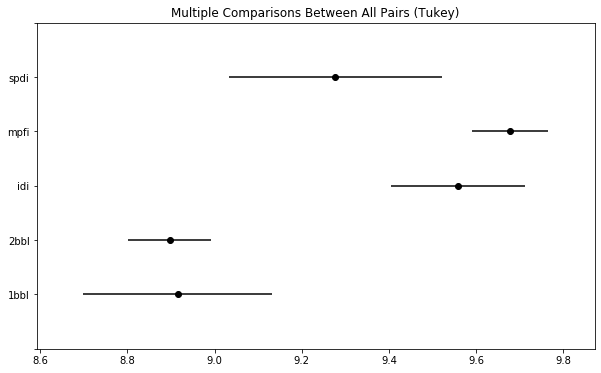

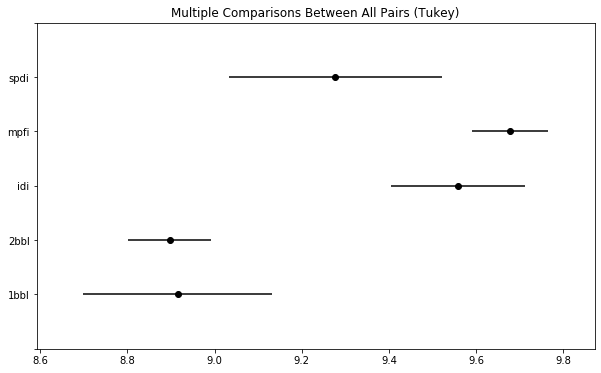

In [72]:
Tukey_HSD.plot_simultaneous()

Examine the plot above. There is a line with a dot shown for each variable. The dot is the mean and the line shows the range of the confidence interval for that mean. Take 1bbl and 2bbl for example. Confidence interval for these two varibales overlap with each other, so we cannot reject the null hypothesis. 

Short summary:
1.	Log price is better represented as normal distribution than price.
2.	For two variable categories:	
    a.	diesel car is more expensive than gas car.
    b.	Turbo car is more expensive than std car.
    c.	Rwd car is more expensive than fwd car
3. For multiple varible categories, they've all been plotted and analyzed using ANOVA. Please read interested categories. 
